In [8]:
import numpy as np
import pandas as pd

In [9]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [12]:
train = pd.read_csv('C:/Users/walte/Downloads/titanic/train.csv')


In [13]:
print('Train shape:', train.shape)

Train shape: (891, 12)


In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [16]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [18]:
test = pd.read_csv('C:/Users/walte/Downloads/titanic/test.csv')

In [19]:
print('Test shape:', test.shape)

Test shape: (418, 11)


In [20]:
print('Train columns:', train.columns.tolist())
print('Test columns:', test.columns.tolist())

Train columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Test columns: ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [21]:
sample_submission = pd.read_csv('C:/Users/walte/Downloads/titanic/gender_submission.csv')

In [22]:
print(sample_submission.head())

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [23]:
print(sample_submission.tail())

     PassengerId  Survived
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


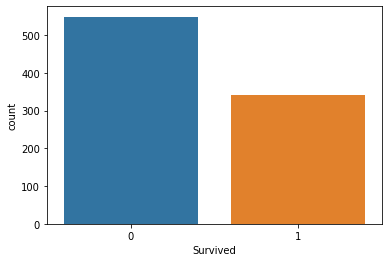

In [25]:
sns.countplot(train['Survived'])

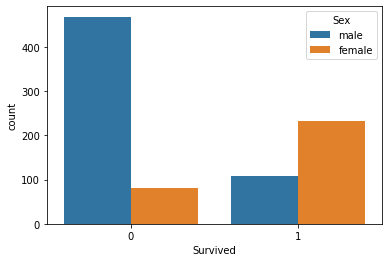

In [26]:
sns.countplot(x = 'Survived', hue = 'Sex', data = train)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logisticRegression = LogisticRegression()
logisticRegression.fit(X = pd.get_dummies(train['Sex']), y = train['Survived'])

C:\Users\walte\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
test['Survived'] = logisticRegression.predict(pd.get_dummies(test['Sex']))

In [30]:
test[['PassengerId', 'Survived']].to_csv('kaggle_submission.csv', index = False)

In [31]:
round(np.mean(train['Survived']), 2)

0.38

In [32]:
train.isnull().mean().sort_values(ascending = False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

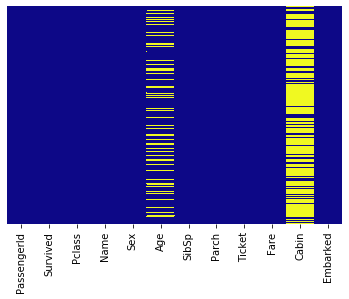

In [33]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'plasma')

In [34]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Slabenoff, Mr. Petco",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


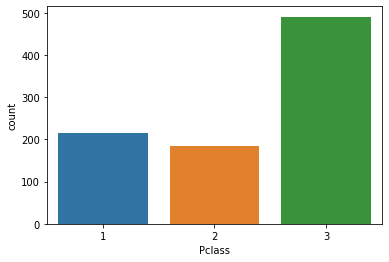

In [35]:
sns.countplot(train['Pclass'])

In [36]:
train.Name.value_counts()

Slabenoff, Mr. Petco                            1
Sedgwick, Mr. Charles Frederick Waddington      1
Andersson, Miss. Ingeborg Constanzia            1
Andersson, Mr. August Edvard ("Wennerstrom")    1
Kelly, Miss. Anna Katherine "Annie Kate"        1
                                               ..
Sirayanian, Mr. Orsen                           1
Coelho, Mr. Domingos Fernandeo                  1
Cohen, Mr. Gurshon "Gus"                        1
Nasser, Mrs. Nicholas (Adele Achem)             1
Francatelli, Miss. Laura Mabel                  1
Name: Name, Length: 891, dtype: int64

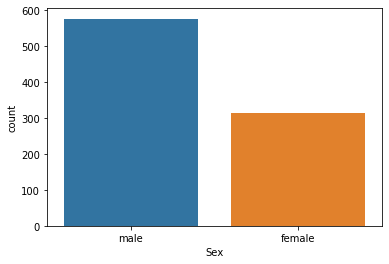

In [37]:
sns.countplot(train['Sex'])

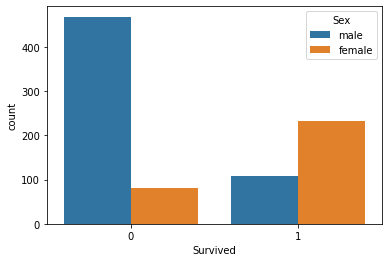

In [38]:
sns.countplot(x = 'Survived', hue = 'Sex', data = train)

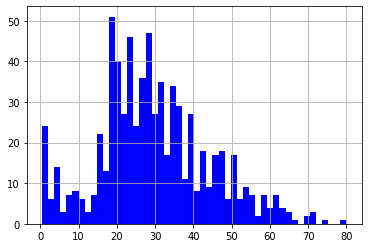

In [39]:
train['Age'].hist(bins = 50, color = 'blue')

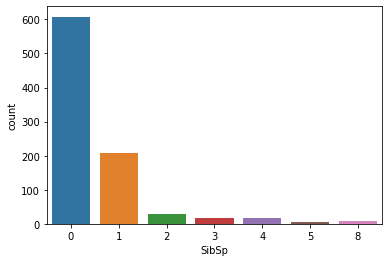

In [40]:
sns.countplot(train['SibSp'])

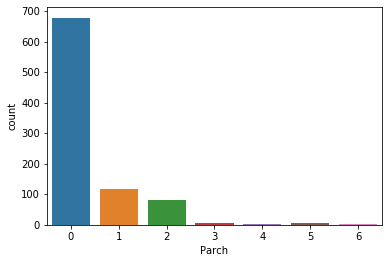

In [41]:
sns.countplot(train['Parch'])

In [42]:
train.Ticket.value_counts()

347082       7
1601         7
CA. 2343     7
CA 2144      6
3101295      6
            ..
W/C 14208    1
347062       1
330909       1
2697         1
A/5 3540     1
Name: Ticket, Length: 681, dtype: int64

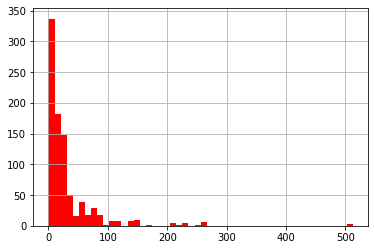

In [43]:
train['Fare'].hist(bins = 50, color = 'red')

In [44]:
train.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
C22 C26        3
D              3
              ..
E58            1
D49            1
C86            1
C110           1
C82            1
Name: Cabin, Length: 147, dtype: int64

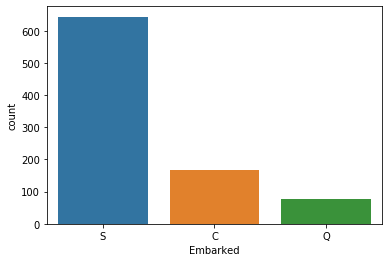

In [45]:
sns.countplot(train['Embarked'])

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


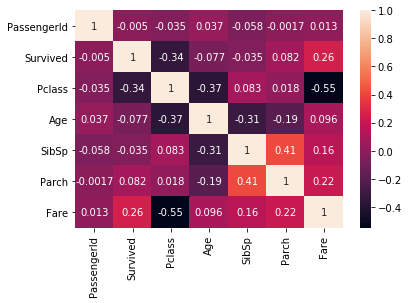

In [47]:
sns.heatmap(train.corr(), annot = True)

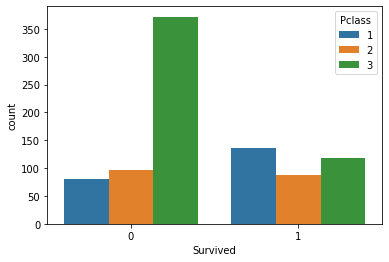

In [48]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = train)

In [49]:
age_group = train.groupby("Pclass")["Age"]

print(age_group.median())

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64


In [50]:
train.loc[train.Age.isnull(), 'Age'] = train.groupby("Pclass").Age.transform('median')

print(train["Age"].isnull().sum())

0


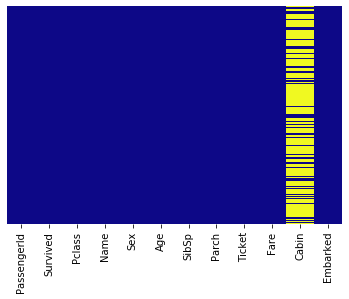

In [51]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'plasma')

In [52]:
train.drop('Cabin', axis = 1, inplace = True)

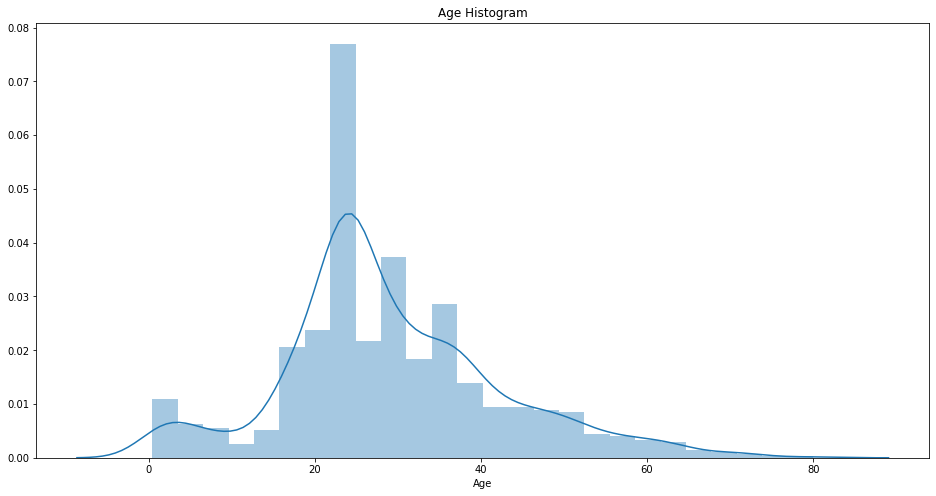

In [53]:
plt.figure(figsize = (16, 8))

sns.distplot(train["Age"])
plt.title("Age Histogram")
plt.xlabel("Age")
plt.show()

In [54]:
train.isnull().sum().sort_values(ascending = False)

Embarked       2
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

In [55]:
from statistics import mode
train["Embarked"] = train["Embarked"].fillna(mode(train["Embarked"]))

In [56]:
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1

C:\Users\walte\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\walte\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

C:\Users\walte\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\walte\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\walte\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so w

In [58]:
train["Sex"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: object

In [59]:
train["Embarked"]

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 891, dtype: object

In [60]:
from sklearn.model_selection import train_test_split


In [61]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived'], axis = 1), 
                                                    train['Survived'], test_size = 0.2, 
                                                    random_state = 2)